In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [5]:
df.shape

(11991, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [7]:
df_sl = (df['satisfaction_level'] - df['satisfaction_level'].mean())/ (df['satisfaction_level'].std())
df_sl

0       -1.035625
1        0.706608
2       -2.155631
3        0.374754
4       -1.077107
           ...   
11986    1.121425
11987    0.457717
11988    0.914016
11989   -1.243033
11990   -0.537844
Name: satisfaction_level, Length: 11991, dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


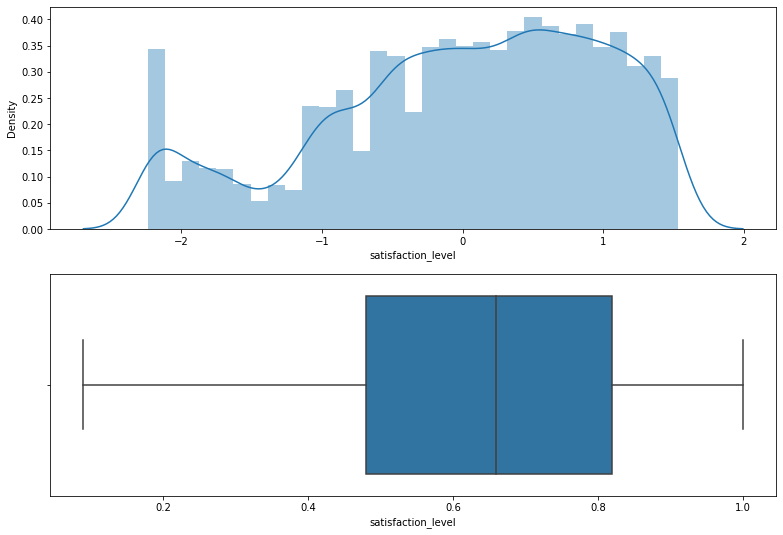

In [11]:
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))

hist_plot = sns.distplot(df_sl, ax = axs[0])

box_plot = sns.boxplot(df["satisfaction_level"], ax = axs[1])

In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


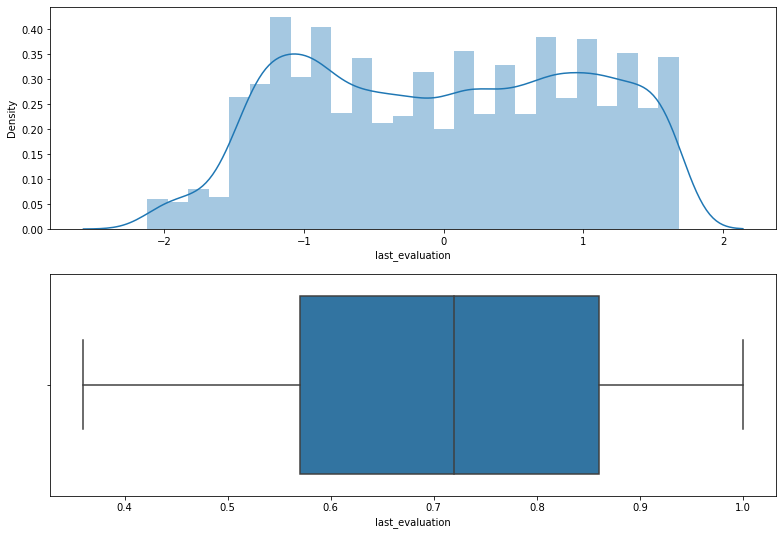

In [13]:
df_sl = (df['last_evaluation'] - df['last_evaluation'].mean())/ (df['last_evaluation'].std())
fig, axs = plt.subplots(nrows= 2, figsize=(13,9))

hist_plot = sns.distplot(df_sl, ax = axs[0])

box_plot = sns.boxplot(df["last_evaluation"], ax = axs[1])

In [16]:
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int

from sklearn.metrics import accuracy_score 

le=LabelEncoder()

df['salary']=le.fit_transform(df['salary'])

In [17]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df = dummies('department',df)

In [14]:
from sklearn.neighbors import LocalOutlierFactor

In [18]:
def outlier_detection(df):
    x = df.drop("left", axis=1)
    y = df.left
    lof =LocalOutlierFactor(n_neighbors = 10, metric= "euclidean") #or manhattan

    res = lof.fit_predict(x)
    x_o = x[res != -1]
    y_o = y[res != -1]
    df = pd.concat([x_o, y_o], axis=1)
    return df
df_cleaned= outlier_detection(df)

In [19]:
df_cleaned.shape

(11963, 18)

In [20]:
df.shape

(11991, 18)